<a href="https://colab.research.google.com/github/m22ai633/GurNum_Digit_Classification/blob/main/GurNum_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import tensorflow as tf
import os
import cv2
from keras.layers import Dense, Flatten
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline


In [111]:
train_path = '/content/drive/MyDrive/ML1_datasets/GurNum/train'
val_path = '/content/drive/MyDrive/ML1_datasets/GurNum/val'

In [112]:
def image_preprocessor(train_path,img_size=(32,32)):
    # Get the list of folder names (i.e., class labels)
    folder_names = sorted(os.listdir(train_path))
    # Initialize empty lists for storing images and labels
    images = []
    labels = []

    #Setting the image size
    img_size = img_size
    # define sharpening kernel
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    # Loop over each folder (i.e., class label)
    for folder_name in folder_names:
        # Get the path to the folder
        folder_path = os.path.join(train_path, folder_name)

        # Loop over each image in the folder
        for filename in tq.tqdm(os.listdir(folder_path)):
            # Get the path to the image
            image_path = os.path.join(folder_path, filename)

            # Read the image using OpenCV
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            #resizing
            image  = cv2.resize(image,img_size)
            #Contrast high
            image = cv2.equalizeHist(image)
            #sharpening
            image = cv2.filter2D(image, -1, sharpen_kernel)
            #normalising
            image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
            #Handling outliers
            #image = np.clip(image,0,1)
            # Append the image and label to the lists
            images.append(image)
            labels.append(int(folder_name))  # Convert folder name to integer label

    # Convert the lists to NumPy arrays
    n_X = len(images)
    n_y = len(set(labels)) 
    images = np.array(images)
    labels = np.array(labels)
    
    return images,labels

In [113]:
x_train,y_train = image_preprocessor(train_path,img_size=(32,32))
x_test,y_test = image_preprocessor(val_path,img_size=(32,32))

100%|██████████| 20/20 [00:00<00:00, 390.32it/s]


6


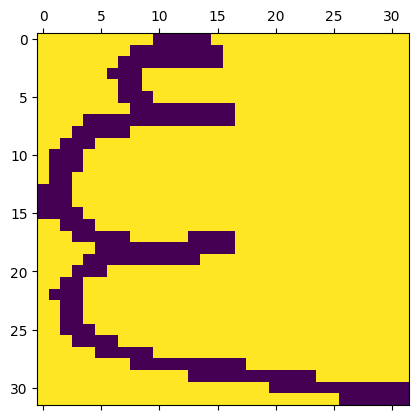

In [114]:
print(y_test[120])
plt.matshow(x_test[120])

In [115]:
nn_model = keras.Sequential([
keras.layers.Flatten(),
keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
keras.layers.Dense(1024,input_shape=(512,), activation='sigmoid'),
keras.layers.Dense(1024,input_shape=(256,), activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

In [116]:
nn_model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)

In [117]:
nn_model.fit(x_train, y_train,epochs= 13, validation_data=(x_test, y_test))

Epoch 1/13
32/32 [==============================] - 3s 61ms/step - loss: 2.3393 - accuracy: 0.2850 - val_loss: 1.1700 - val_accuracy: 0.7247
Epoch 2/13
32/32 [==============================] - 2s 60ms/step - loss: 0.5396 - accuracy: 0.8570 - val_loss: 0.4045 - val_accuracy: 0.8427
Epoch 3/13
32/32 [==============================] - 3s 89ms/step - loss: 0.2224 - accuracy: 0.9230 - val_loss: 0.3533 - val_accuracy: 0.8764
Epoch 4/13
32/32 [==============================] - 2s 67ms/step - loss: 0.1006 - accuracy: 0.9690 - val_loss: 0.1804 - val_accuracy: 0.9382
Epoch 5/13
32/32 [==============================] - 2s 58ms/step - loss: 0.0556 - accuracy: 0.9840 - val_loss: 0.2477 - val_accuracy: 0.9326
Epoch 6/13
32/32 [==============================] - 2s 59ms/step - loss: 0.0644 - accuracy: 0.9830 - val_loss: 0.3866 - val_accuracy: 0.9270
Epoch 7/13
32/32 [==============================] - 2s 56ms/step - loss: 0.0639 - accuracy: 0.9760 - val_loss: 0.1474 - val_accuracy: 0.9551
Epoch 8/13
32

In [118]:
nn_model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 10ms/step - loss: 0.1616 - accuracy: 0.9607


[0.16162119805812836, 0.9606741666793823]

6/6 [==============================] - 0s 9ms/step
Predicted Value is  1
Predicted Value is  4
Predicted Value is  2


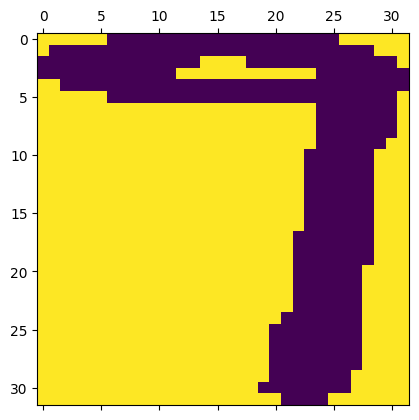

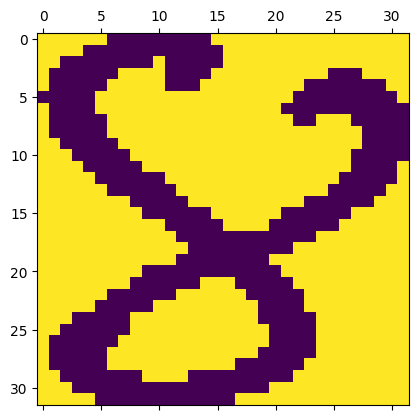

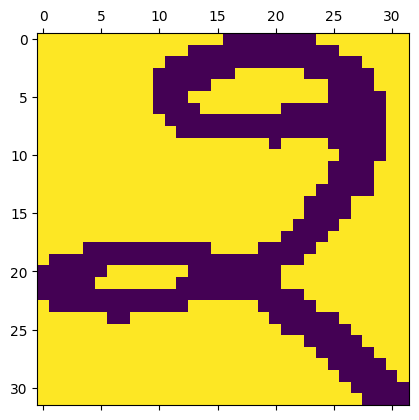

In [119]:
# predict 1st image
plt.matshow(x_test[20])
y_predicted = nn_model.predict(x_test)
y_predicted[20]

print('Predicted Value is ',np.argmax(y_predicted[20]))
# test some more values
plt.matshow(x_test[76])
print('Predicted Value is ',np.argmax(y_predicted[76]))
plt.matshow(x_test[41])
print('Predicted Value is ',np.argmax(y_predicted[41]))

In [120]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 1, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 15,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

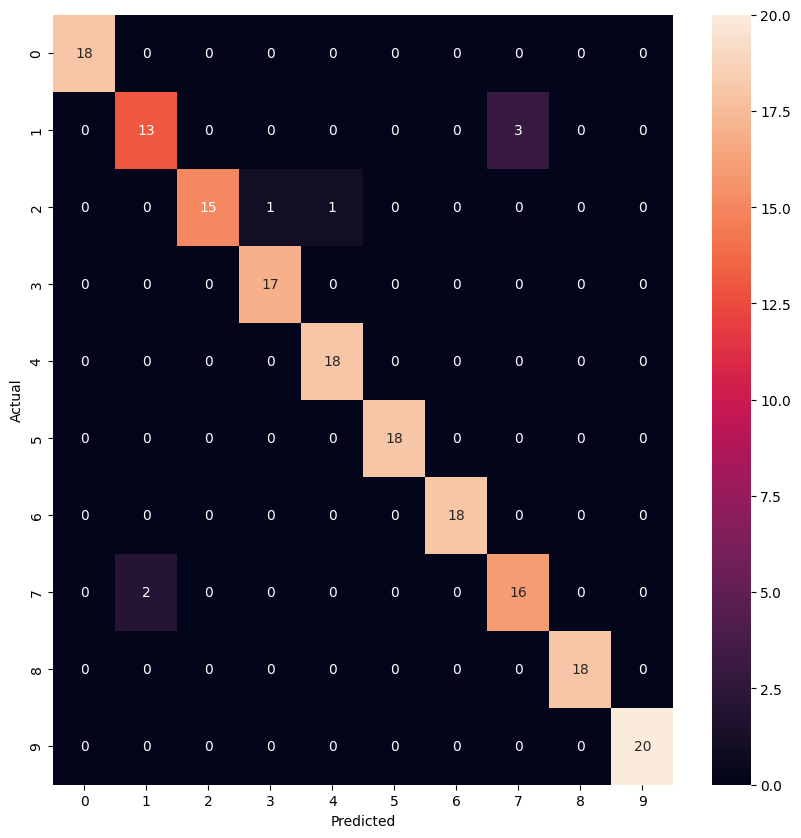

In [121]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')